Need data file "exp1_control_data.csv" and "exp1_control_distances.csv"

# Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
from matplotlib.ticker import MaxNLocator
import scipy as sp

# Process Data

In [3]:
data = pd.read_csv("exp1_control_data.csv")

In [4]:
distancedf = pd.read_csv("exp1_control_distances.csv")

x_raw_distances = [0, 12, 20, 25, 32, 45, 64]
x_raw_distid = [0, 3, 5, 6, 7, 8, 9]

In [5]:
# only keep conditions where Euclidean distance remained constant but horizontal distance changed
selected_conditions = ['shape1 concave 7', 'shape1 concave 8', 'shape1 concave 9',
                       'shape2 concave 7', 'shape2 concave 8', 'shape2 concave 9',
                       'shape3 concave 8', 'shape3 concave 9',
                       'shape4 concave 6', 'shape4 concave 7', 'shape4 concave 8', 'shape4 concave 9']
if selected_conditions != []:
  distancedf_selected = pd.DataFrame()
  data_selected = pd.DataFrame()
  for keyword in selected_conditions:
    data_selected[keyword] = np.squeeze(data.loc[:, data.columns.str.contains(keyword)].values)
    shapename, concavity, distid = keyword.split(' ')
    distancedf_selected = distancedf_selected.append(distancedf[(distancedf["shapeid"]==shapename) & (distancedf['xraw']==float(x_raw_distances[x_raw_distid.index(int(distid))])) & (distancedf["convex"]==concavity)])


In [6]:
# extract concave df for every shape separately, only selected conditions
shape1df = data_selected[data_selected.columns[data_selected.columns.str.contains('shape1 concave.', regex=True)]]
shape2df = data_selected[data_selected.columns[data_selected.columns.str.contains('shape2 concave.', regex=True)]]
shape3df = data_selected[data_selected.columns[data_selected.columns.str.contains('shape3 concave.', regex=True)]]
shape4df = data_selected[data_selected.columns[data_selected.columns.str.contains('shape4 concave.', regex=True)]]

# extract euclidean distance for every shape separately, only selected conditions
eucshape1 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape1_concave')]["xeuclidean"]
eucshape2 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape2_concave')]["xeuclidean"]
eucshape3 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape3_concave')]["xeuclidean"]
eucshape4 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape4_concave')]["xeuclidean"]

# extract raw horizontal distance for every shape separately, only selected conditions
horizshape1 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape1_concave')]["xhorizontal"]
horizshape2 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape2_concave')]["xhorizontal"]
horizshape3 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape3_concave')]["xhorizontal"]
horizshape4 = distancedf_selected.loc[(distancedf_selected["shape"]=='shape4_concave')]["xhorizontal"]

yshape1 = np.array(shape1df) # [num_subjects, 4_dist_conditions]
yshape2 = np.array(shape2df)
yshape3 = np.array(shape3df)
yshape4 = np.array(shape4df)

print(yshape1.shape, yshape2.shape, yshape3.shape, yshape4.shape)

(42, 3) (42, 3) (42, 2) (42, 4)


# Helper Functions

In [7]:
# Plot CI for linear regression
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
    '''
    Return an axes of confidence bands using a simple approach.
    Source: https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot
    
    Notes
    -----
    .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
    .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

    References
    ----------
    .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
       http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

    '''
    if ax is None:
        ax = plt.gca()

    ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    ax.fill_between(x2, y2 + ci, y2 - ci, color="gray", alpha=0.2, edgecolor="") # fill color can instead be blue (#b9cfe7)

    return ax

def equation(a, b):
    '''
    Return a 1D polynomial.
    '''
    return np.polyval(a, b) 

# Linear Regression

par0: -0.007010157433268051 [-0.010701547354852054  -0.003318767511684048]
par1: 3.133401420095322 [2.951403043690928  3.315399796499716]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


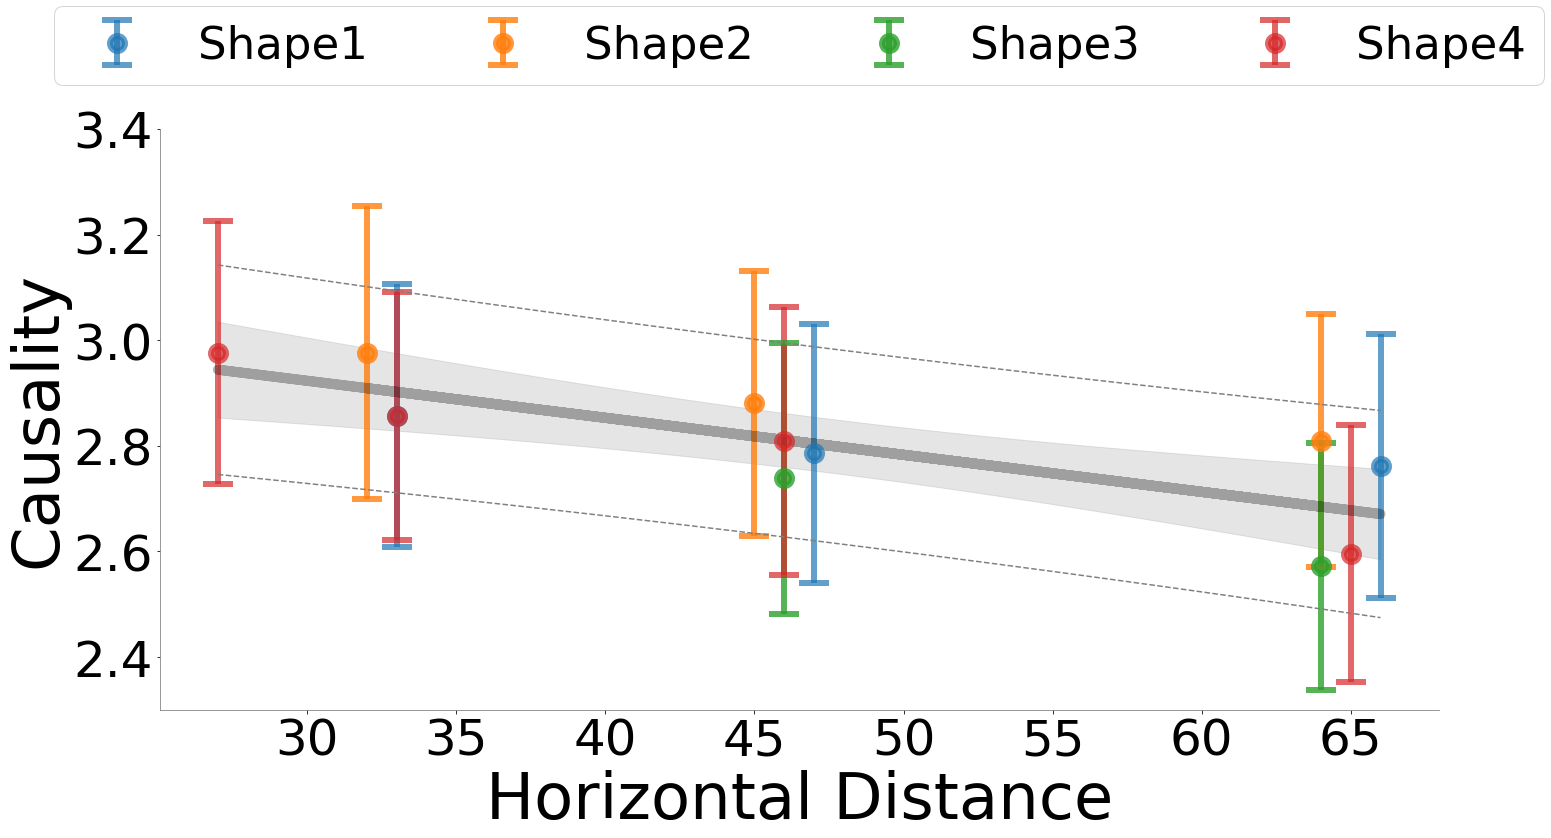

In [8]:
# Figure config
LABELFONTSIZE = 64
TICKFONTSIZE = 50
ylimlow = 2.3
ylimup = 3.4
fig, ax = plt.subplots(1,1, figsize=(22, 12))

# Plot causality ratings for each shape separately.
# In every shape, across conditions, Euclidean distance remained same, but horizontal distance changed
plt.errorbar(x=horizshape1, y=yshape1.mean(axis=0), 
            yerr=stats.sem(yshape1, axis=0), 
             linestyle='None', lw=6, 
             marker='o', ms=15, capsize=15, markeredgewidth=6, alpha=0.7, 
             label='Shape1')
plt.errorbar(x=horizshape2, y=yshape2.mean(axis=0), 
            yerr=stats.sem(yshape2, axis=0), 
            linestyle='None', lw=6, 
             marker='o', ms=15, capsize=15, markeredgewidth=6, alpha=0.8, 
             label='Shape2')
plt.errorbar(x=horizshape3, y=yshape3.mean(axis=0), 
            yerr=stats.sem(yshape3, axis=0),
            linestyle='None', lw=6, 
             marker='o', ms=15, capsize=15, markeredgewidth=6, alpha=0.8, 
             label='Shape3')
plt.errorbar(x=horizshape4, y=yshape4.mean(axis=0), 
            yerr=stats.sem(yshape4, axis=0), 
            linestyle='None', lw=6, 
             marker='o', ms=15, capsize=15, markeredgewidth=6, alpha=0.7, 
             label='Shape4')
plt.ylim(ylimlow, ylimup)


# Linear regression
heights = []
for i in [horizshape1, horizshape2, horizshape3, horizshape4]:
  for j in i.values:
    heights.append(j)
weights = []
for i in [yshape1.mean(axis=0), yshape2.mean(axis=0), yshape3.mean(axis=0), yshape4.mean(axis=0)]:
  for j in i:
    weights.append(j)
x = np.array(heights)
y = np.array(weights)
p, cov = np.polyfit(x, y, 1, cov=True)                    
y_model = equation(p, x)                                  
# statistics
n = y.size # num observations                                          
m = p.size # num parameters
dof = n - m   
t = stats.t.ppf(0.975, n - m)  
# estimates of error 
resid = y - y_model                           
chi2 = np.sum((resid / y_model)**2)     
chi2_red = chi2 / dof                      
s_err = np.sqrt(np.sum(resid**2) / dof)    
# CI for parameters
for i, par, var in zip(range(n), p, np.diag(cov)):
    sigma = var**0.5
    print('par{0}: {1} [{2}  {3}]'.format(i, par, par - sigma*t, par + sigma*t))

# plot line fit
ax.plot(x, y_model, "-", color="black", linewidth=10, alpha=0.3)  
x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax) # plot CI
pi = t * s_err * np.sqrt(1 + 1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2)) # prediction interval
ax.fill_between(x2, y2 + pi, y2 - pi, color="None", linestyle="--")
ax.plot(x2, y2 - pi, "--", color="0.5")
ax.plot(x2, y2 + pi, "--", color="0.5")

# Figure configurations
ax.spines["top"].set_color("0.5")
ax.spines["bottom"].set_color("0.5")
ax.spines["left"].set_color("0.5")
ax.spines["right"].set_color("0.5")
ax.get_xaxis().set_tick_params(direction="out")
ax.get_yaxis().set_tick_params(direction="out")
ax.xaxis.tick_bottom()
ax.yaxis.tick_left() 
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel("Horizontal Distance", fontsize=LABELFONTSIZE)
plt.ylabel("Causality", fontsize=LABELFONTSIZE)
plt.xticks(fontsize=TICKFONTSIZE)
plt.yticks(fontsize=TICKFONTSIZE)
plt.ylim(ylimlow, ylimup)
plt.legend(fontsize=TICKFONTSIZE-5, ncol=4, loc="upper center", bbox_to_anchor=(0.5, 1.25))
plt.tight_layout()